In [1]:
import cv2
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
points_r_x = []
points_r_y = []
points_nr_x = []
points_nr_y = []
nps = 1

In [3]:
def click_event1(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        global nps
        print(nps, x, ' ', y)
        #fp1.write("\"" + str(x) + "\"" + "," + "\"" + str(y) + "\"" + "\n")
        if nps<=50:
            points_r_x.append(int(x))
            points_r_y.append(int(y))
        nps = nps+1

def click_event2(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        global nps
        print(nps, x, ' ', y)
        #fp2.write("\"" + str(x) + "\"" + "," + "\"" + str(y) + "\"" + "\n")
        if nps<=100:
            points_nr_x.append(int(x))
            points_nr_y.append(int(y))
        nps = nps+1

In [4]:
def calp1p2(i,j):
    r = np.subtract(rgb_values[:,i,j],T1)
    nr = np.subtract(rgb_values[:,i,j],T2)
    river_class = np.dot(np.dot(r.T,sigma_inverse_r), r)
    non_river_class = np.dot(np.dot(nr.T,sigma_inverse_nr), nr)
    sigma_det_r = np.linalg.det(sigma_r)
    p1 = (-0.5) * 1/np.sqrt(sigma_det_r) * np.exp(river_class);
    sigma_det_nr = np.linalg.det(sigma_nr)
    p2 = (-0.5) * 1/np.sqrt(sigma_det_nr) * np.exp(non_river_class);
    return p1,p2

In [5]:
def bayes_classifier(P1, P2):
    output=np.ndarray(shape=(512,512), dtype = np.integer)
    for i in range(512):
        for j in range(512):
            p1,p2 = calp1p2(i,j)
            if((P1 * p1) >= (P2 * p2)):
                output[i][j]=255
            else:
                output[i][j]=0
    return output

In [7]:
opt = input("Do to want to select points on images?[Y|N]:")
if opt == 'Y' or opt == 'y':
    #fp1 = open("river_points.csv","w")
    img = cv2.imread('1.jpg', 1)
    cv2.imshow('River_points_1.jpg', img)
    cv2.setMouseCallback('River_points_1.jpg', click_event1)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    #fp1.close()
        
    nps = 1
    #fp2 = open("non_river_points.csv","w")
    img = cv2.imread('1.jpg', 1)
    cv2.imshow('Non_River_points_1.jpg', img)
    cv2.setMouseCallback('Non_River_points_1.jpg', click_event2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    #fp2.close()
        
else:
    file = open('river_points.csv', "r+")
    reader = csv.reader(file)
    for row in reader:
        points_r_x.append(int(row[0]))
        points_r_y.append(int(row[1]))
    file.close()
        
    file = open('non_river_points.csv', "r+")
    reader = csv.reader(file)
    for row in reader:
        points_nr_x.append(int(row[0]))
        points_nr_y.append(int(row[1]))
    file.close()

Do to want to select points on images?[Y|N]:n


In [8]:
rgb_values = np.ndarray(shape=(4,512,512),dtype = np.integer)
for i in range(4):
    image = plt.imread(str(i+1)+".jpg")
    for j in range(512):
        for k in range(512):
            rgb_values[i][j][k] = image[j][k][0]

#calculating mean of river class
T1 = [0,0,0,0]
d1 = np.ndarray(shape=(50,4))
for i in range(50):
    for j in range(4):
        T1[j] += rgb_values[j,points_r_x[i],points_r_y[i]]
for j in range(4):
    T1[j] /= 50
for i in range(50):
    d1[i] = np.subtract(rgb_values[:,points_r_x[i],points_r_y[i]],T1)
    
#calculating mean of non-river class
T2 = [0,0,0,0]
d2 = np.ndarray(shape=(100,4))
for i in range(100):
    for j in range(4):
        T2[j] += rgb_values[j,points_nr_x[i],points_nr_y[i]]
for j in range(4):
    T2[j] /= 100
for i in range(100):
        d2[i] = np.subtract(rgb_values[:,points_nr_x[i],points_nr_y[i]],T2)

In [9]:
#calculating covariance matrices
sigma_r = np.ndarray(shape=(4,4),dtype=np.float64)
sigma_nr = np.ndarray(shape=(4,4),dtype=np.float64)
    
sigma_r = np.cov(d1.T,bias=True)
sigma_nr = np.cov(d2.T,bias=True)
    
sigma_inverse_r = np.linalg.inv(sigma_r)
sigma_inverse_nr = np.linalg.inv(sigma_nr)

for P1=0.3,P2=0.7........


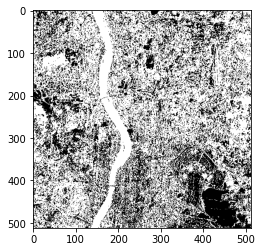

for P1=0.7,P2=0.3........


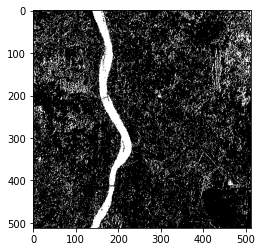

for P1=0.5,P2=0.5........


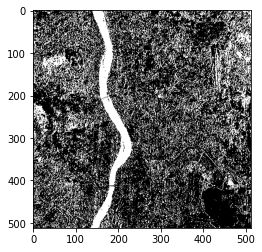

In [10]:
print("for P1=0.3,P2=0.7........")
output1 = bayes_classifier(P1=0.3,P2=0.7)
plt.imshow(output1, cmap='gray')
plt.show()
    
print("for P1=0.7,P2=0.3........")
output2 = bayes_classifier(P1=0.7,P2=0.3)
plt.imshow(output2, cmap='gray')
plt.show()
    
print("for P1=0.5,P2=0.5........")
output3 = bayes_classifier(P1=0.5,P2=0.5)
plt.imshow(output3, cmap='gray')
plt.show()